# Banks — Customer Churn Analysis
---


## Materials
---
* [Dashboard](https://public.tableau.com/views/Project_final_16857298399680/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link)
* [Presentation](https://drive.google.com/file/d/1wbxudKwBe4zeTKiBVdaJNGwZCV5TbwQB/view?usp=sharing)

## Project descroption
---
**Client** - regional bank "Metanprom," which is facing a crisis due to the critical mass of customer churn.

The client has access to a dataset with anonymized user data.

**Dataset Columns:**
* `userid` - user identifier,
* `score` - credit scoring points,
* `City` - city,
* `Gender` - gender,
* `Age` - age,
* `Objects` - number of owned objects,
* `Balance` - account balance,
* `Products` - number of products used by the client,
* `CreditCard` - presence of a credit card (yes/no),
* `Loyalty` - active client (yes/no),
* `estimated_salary` - estimated salary of the client,
* `Churn` - churn status (whether the client left or not).


## Task description
---

**Task:** Conduct an analysis of customers of the regional bank and **identify segments** (profiles of groups defined by 2-3 features) of customers who are prone to churn from the bank's services.

**Results:** Prepare a presentation and dashboard that can demonstrate the research findings effectively.

## Data loading and exploration
---


### Libraries
---

In [1]:
#importing lib-s and preferences
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import scipy as sc
import datetime as dt
import math as mth
from datetime import datetime, timedelta
from scipy import stats as st
pd.set_option('display.max_columns', None) #for displaying all columns
pd.set_option('display.max_colwidth', None) #for displaying full widht of columns
from plotly import graph_objects as go
import plotly.express as px
import warnings; warnings.filterwarnings(action = 'ignore') #for warnings=OFF

### Functions
---

In [2]:
#function, which shows head, tail, info, description, duplicates, counts Nan's and etc. of DF

def starting_pack(data):
    print('Main info about dataframe:')
    data.info()
    print()
    print('First rows of DF:')
    display(data.head())
    print('Last rows of DF:')
    display(data.tail())
    print('Number of duplicates:')
    display(data.duplicated().sum())
    print('Number of nans:')
    display(data.isna().sum())
    print('Description:')
    display(data.describe())

In [3]:
# function, which draws graphs of distribution (histogram + boxplot)

def distribution(column):
  fig, ax = plt.subplots(figsize=(15,5), sharex = True, sharey = True)
  #common naming
  fig.suptitle('Distribution histogram and box plot of the column ' + column)

  #histplot
  sns.histplot(data[column], ax = plt.subplot(1, 2, 1))
  plt.ylabel('Clients ')
  plt.grid(which='major',
       color = 'black',
       alpha=0.3,
       axis = 'x')

  #boxplot
  sns.boxplot(x=data[column], ax = plt.subplot(1, 2, 2))

  plt.show();

In [4]:
# function, which draws graphs of aggregated data by name of column

def aggregation(column):
  #aggregating
  temp_df = (data
      .groupby(column)
      .agg({'age':'count'})
      )
  #drawing
  plt.figure(figsize=(12, 5))

  #barplot
  sns.barplot(x='age', y=temp_df.index, data=temp_df, palette='Blues_r', alpha=1, orient='h')
  plt.title('The distribution of clients by '+column)
  plt.xlabel('Clients')
  plt.ylabel(column)
  plt.grid(which='major',
       color = 'black',
       alpha=0.3,
       axis = 'x')
  plt.show()


In [5]:
# function, which draws graphs of data by name of the column with churn marker

def churn_distribution(column):

  fig, ax = plt.subplots(figsize=(15,5))
  #common naming
  fig.suptitle('The distribution histogram and box plot of the column '+ column + 'with a breakdown by the churn feature')

  # histplot
  sns.histplot(data=data.query('churn == 0'), x=column, palette='Blues_r', label='retained customers',alpha=0.7, ax = plt.subplot(1, 2, 1))
  sns.histplot(data=data.query('churn == 1'), x=column, color='orange', label='churned customers', alpha=0.8, ax = plt.subplot(1, 2, 1))
  plt.ylabel('Number of clients')
  plt.grid(which='major',
        color = 'black',
        alpha=0.3,
        axis = 'x')
  plt.legend()

  #boxplot
  sns.boxplot(y=column, x='churn', data = data, ax = plt.subplot(1, 2, 2))
  plt.grid(which='major',
        color = 'black',
        alpha=0.3,
        axis = 'y')

  plt.show()

In [6]:
# function, which draws barplots by name of the columns with churn marker (percentage of total)

def churn_aggregation(column):
    temp_1 = data.groupby(column).agg(count=('age','count')).reset_index()
    temp_1['percentage'] = round(temp_1['count']/temp_1['count']*100,2)
    temp_2 = (data
                .query('churn == 1')
                .groupby(column)
                .agg(count=('age','count'))
                .reset_index()
        )
    temp_2['percentage'] = round(temp_2['count']/temp_1['count']*100,2)

    plt.figure(figsize=(8, 5))

    ax = sns.barplot(x=column, y='percentage',data=temp_2, orient='v',palette='Reds_r', alpha=1)
    ax.axhline(round(data['churn'].mean()*100,2), ls='dashdot', label='AVG churn rate', c='green')

    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 5),
                       textcoords='offset points')

    plt.title('Churn rate with a breakdown by '+column )
    plt.xlabel(column)
    plt.ylabel('Proportions of clients, % of the total')
    plt.legend()
    plt.show()

#Old functin. Issues between jupiter notebook and google collab. Jupiter was too old to work with 'bar_label'
# # function, which draws barplots by name of the columns with churn marker (percentage of total)

# def churn_aggregation(column):
#   temp = (data
#           .groupby(column)
#           .agg(count=('age','count'))
#           .reset_index()
#   )
#   temp['percentage'] = round(temp['count']/temp['count']*100,2)

#   temp_2 = (data
#           .query('churn == 1')
#           .groupby(column)
#           .agg(count=('age','count'))
#           .reset_index()
#   )
#   temp_2['percentage'] = round(temp_2['count']/temp['count']*100,2)

#   plt.figure(figsize=(10, 7))
#   ax = sns.barplot(x=column, y='percentage',data=temp, orient='v',palette='Blues_r', alpha=0.3,)
#   ax = sns.barplot(x=column, y='percentage',data=temp_2, orient='v',palette='Reds_r', alpha=1, label='отточные клиенты')

#   #labels
#   # annotate
#   ax.bar_label(ax.containers[1], label_type='edge')

#   # pad the spacing between the number and the edge of the figure
#   ax.margins(y=0.1)

#   # line with mean churn rate
#   ax.axhline(round(data['churn'].mean()*100,2), ls='dashdot', label='Средний уровень оттока', c='green')

#   plt.title('Доля отточных клиентов с разбивкой по '+column)
#   plt.xlabel(column)
#   plt.ylabel('Доли клиентов, % от общего')

#   plt.legend()
#   plt.show()



### Dataset loading
---

In [7]:
# openning file from common directory
url = 'https://raw.githubusercontent.com/Bagg1n5/datasets/main/bank_dataset.csv'
data = pd.read_csv(url)

In [8]:
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Data exploration
---

Starting `satring_pack` function, which help me to take the first look on the data

In [9]:
starting_pack(data)

Main info about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

First rows of DF:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Last rows of DF:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1
9999,15671055,792,Ярославль,Ж,28,4,130142.79,1,1,0,38190.78,0


Number of duplicates:


0

Number of nans:


userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

Description:


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1. Client ages range from 18 to 92 years;
2. Number of owned objects ranges from 0 to 10;
3. Credit scoring points range from 350 to 850;
4. Clients use between 1 to 4 bank products;
5. 70% of clients use credit cards;
6. 51% of clients are active;
7. Churn rate is 20.37%.


Overall, the dataset seems to be in good shape (the logic of the data format matches the column names, no duplicates, etc.). Need to look for implicit duplicates, examine the cities present in the dataset, and check certain columns.


In [10]:
print(data['City'].unique())

['Ярославль' 'Рыбинск' 'Ростов Великий']


There are only 3 cities, as previously reported. Great, there are no issues with this column.

In [11]:
print(data['Gender'].unique())

['Ж' 'М']


Gender division is archaic (only M and F (just a joke)).

**Summary:**

1. The dataset contains 10,000 rows.
2. There are missing values in the "Balance" column.
3. There are no explicit duplicates.
4. Data types match the logic of column names.
5. Column names need to be standardized to a consistent style.
6. Client ages range from 18 to 92 years.
7. The number of owned objects ranges from 0 to 10.
8. Credit scoring points range from 350 to 850.
9. Clients use between 1 to 4 bank products.
10. Implicit duplicates need to be checked.
11. 70% of clients use credit cards.
12. 51% of clients are active.
13. Churn rate is 20.37%.

## Data prerocessing
---
Working with case sensitivity, duplicates, implicit duplicates, missing values, outliers, and anomalies is an essential part of data preprocessing.

In [12]:
# renaming columns
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid':'user_id','creditcard':'credit_card'})
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Need to check for implicit duplicates in the user_id - city pair (the only logical combination of columns).

Salaries, balances, and credit ratings can be the same and may repeat.

In [13]:
data[data.duplicated(subset=['user_id','city'])]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn


There are no implicit duplicates.

Closer look at the missing values in the `balance` column.

In [14]:
data.query('balance.isna()')

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


At first glance, nothing unusual is evident. The nature of the missing values is unclear. Given that the minimum value in this column is 3768.69, it's possible that the missing values are indeed 0, but this is not obvious. For now, I'm going to leave it as is.

Let's examine the missing values in the context of cities:

In [15]:
city_nans = data.query('balance.isna()').groupby('city').agg(nans=('age','count')).reset_index()
city_total = data.groupby('city').agg(total=('age','count')).reset_index()
city_nans = city_nans.join(city_total.set_index('city'), on='city')
city_nans['percentage'] = round(city_nans['nans']/city_nans['total']*100,2)
city_nans

,city,nans,total,percentage
0,Рыбинск,1199,2477,48.41
1,Ярославль,2418,5014,48.22


In [16]:
display(data.query('balance.isna()').describe().T, data.query('balance.notnull() and city != "Ростов Великий"').describe().T)
display(data.query('city == "Ростов Великий"').describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,3617.0,1.573469e+07,71947.494611,15608442.00,15672255.00,15736083.00,15796286.00,15858100.00
score,3617.0,6.494529e+02,96.158798,350.00,583.00,651.00,717.00,850.00
age,3617.0,3.843489e+01,10.492002,18.00,31.00,37.00,43.00,88.00
objects,3617.0,5.071330e+00,2.860781,0.00,3.00,5.00,7.00,10.00
balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,3617.0,1.784628e+00,0.496455,1.00,1.00,2.00,2.00,4.00
credit_card,3617.0,7.166160e-01,0.450704,0.00,0.00,1.00,1.00,1.00
loyalty,3617.0,5.178325e-01,0.499751,0.00,0.00,1.00,1.00,1.00
estimated_salary,3617.0,9.898356e+04,57730.828955,90.07,49506.82,98618.79,148330.97,199992.48
churn,3617.0,1.382361e-01,0.345195,0.00,0.00,0.00,0.00,1.00


,count,mean,std,min,25%,50%,75%,max
user_id,3874.0,1.573298e+07,71084.222113,15608437.00,1.567142e+07,15732154.50,1.579443e+07,15858426.00
score,3874.0,6.509344e+02,96.138919,350.00,5.840000e+02,653.50,7.160000e+02,850.00
age,3874.0,3.882602e+01,10.432832,18.00,3.200000e+01,37.00,4.400000e+01,92.00
objects,3874.0,4.959990e+00,2.892997,0.00,2.000000e+00,5.00,7.000000e+00,10.00
balance,3874.0,1.198906e+05,31931.148230,3768.69,9.836731e+04,120032.47,1.409872e+05,250898.09
products,3874.0,1.299432e+00,0.530179,1.00,1.000000e+00,1.00,2.000000e+00,4.00
credit_card,3874.0,6.897264e-01,0.462665,0.00,0.000000e+00,1.00,1.000000e+00,1.00
loyalty,3874.0,5.240062e-01,0.499488,0.00,0.000000e+00,1.00,1.000000e+00,1.00
estimated_salary,3874.0,1.004608e+05,56807.410671,123.07,5.242999e+04,100754.45,1.489704e+05,199953.33
churn,3874.0,1.866288e-01,0.389664,0.00,0.000000e+00,0.00,0.000000e+00,1.00


,count,mean,std,min,25%,50%,75%,max
user_id,2509.0,1.573329e+07,73228.429284,15608515.00,15670131.00,15732622.00,15798467.00,15858392.00
score,2509.0,6.514536e+02,98.168937,350.00,584.00,651.00,722.00,850.00
age,2509.0,3.977162e+01,10.519143,18.00,32.00,38.00,45.00,84.00
objects,2509.0,5.009964e+00,2.935154,0.00,2.00,5.00,8.00,10.00
balance,2509.0,1.197301e+05,27022.006157,27288.43,102800.72,119703.10,137560.38,214346.96
products,2509.0,1.519729e+00,0.619420,1.00,1.00,1.00,2.00,4.00
credit_card,2509.0,7.138302e-01,0.452060,0.00,0.00,1.00,1.00,1.00
loyalty,2509.0,4.974093e-01,0.500093,0.00,0.00,0.00,1.00,1.00
estimated_salary,2509.0,1.011134e+05,58263.011501,11.58,51016.02,102397.22,151083.80,199970.74
churn,2509.0,3.244320e-01,0.468256,0.00,0.00,0.00,1.00,1.00


In the cities of Yaroslavl and Rybinsk, there are missing values in the "balance" column for 48% of the entries. The only difference in the distribution of missing values is that there are no users listed in the city of Rostov Veliky.

When examining the samples with "only missing values in Yaroslavl and Rybinsk," "without missing values (excluding Rostov Veliky)," and "only Rostov Veliky," no significant differences were observed.

The presence of such missing values is likely to be attributed to data collection errors, possibly at the regional level within the Yaroslavl region.

Next, I will write a function named `distribution` (see subsection "Functions") for plotting distribution graphs and box plots for columns **with continuous variables**.

Analysing the columns `"score," "balance," "estimated_salary," and "age"`

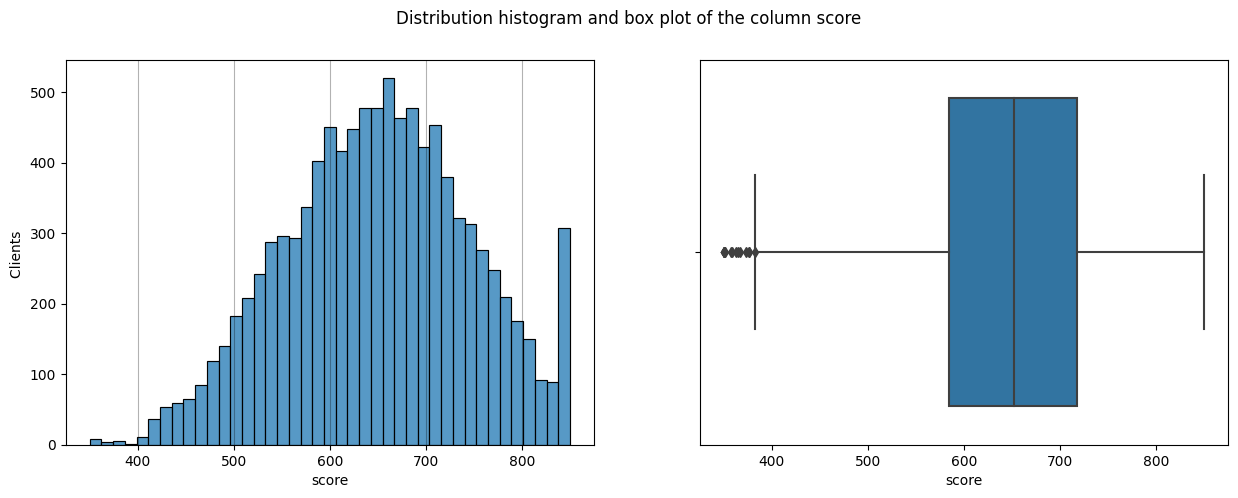

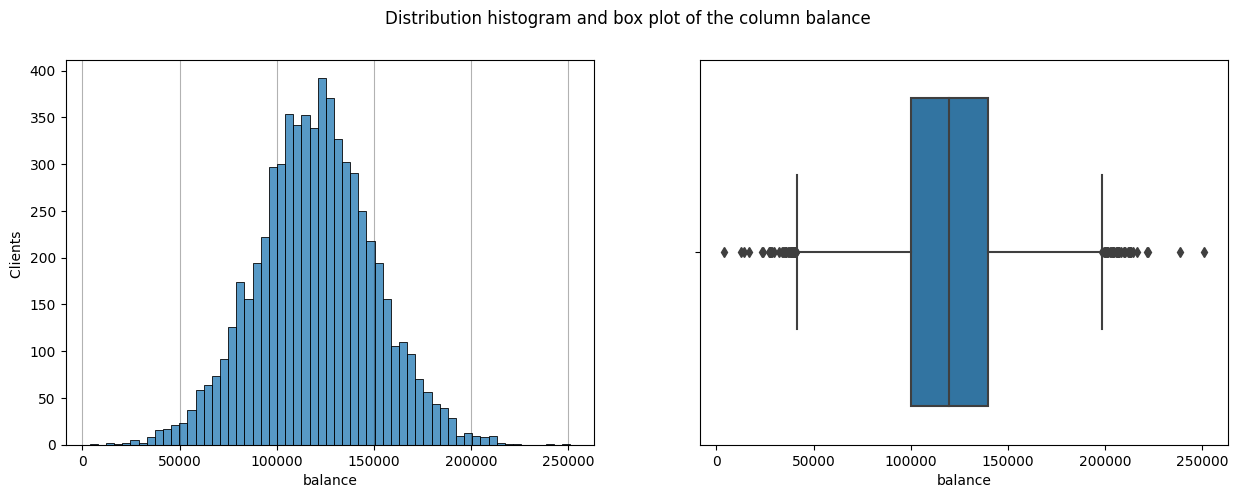

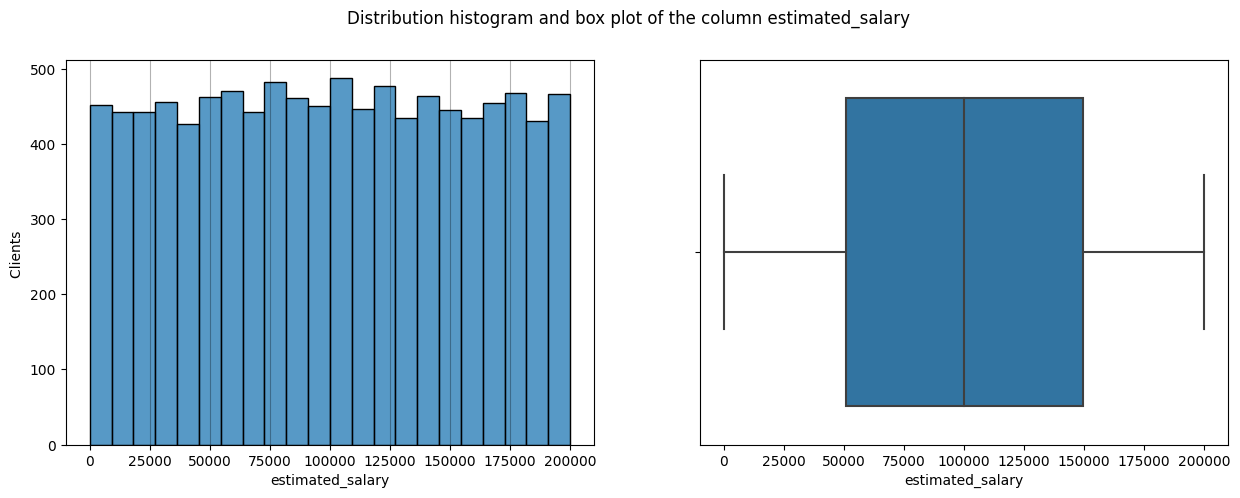

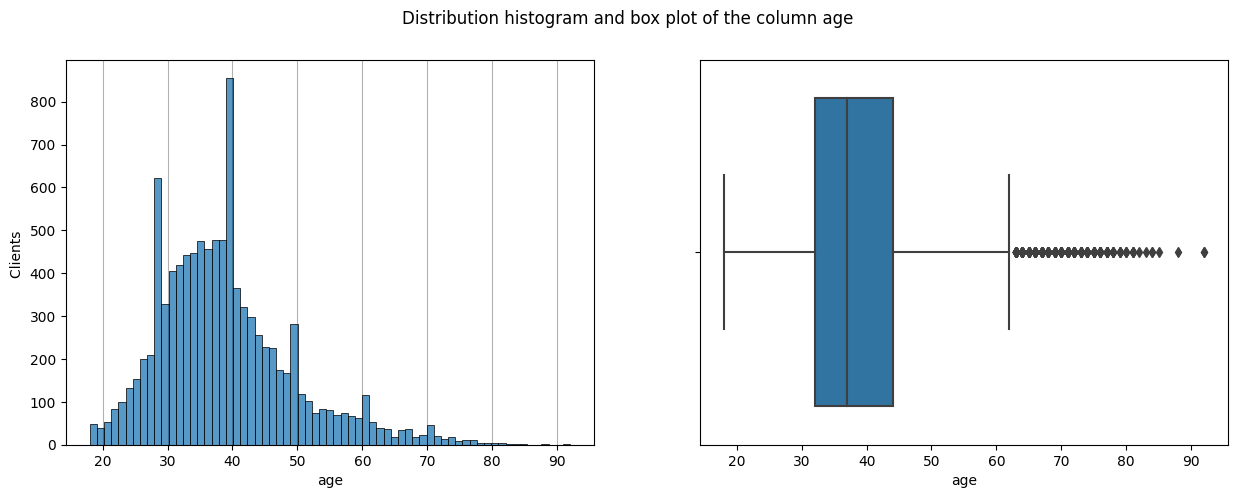

In [17]:
for i in ["score", "balance", "estimated_salary", "age"]:
  distribution(i)
  print()

1. The customer scoring seems normal, but there is a high value of the score for a large concentration of users (around 300 users) with scores above 840. We need to take a closer look at this.

2. There's nothing significant to add to the "balance" column. It's likely just the balance of money in the account.

3. The distribution of "estimated salary" is interesting. It's likely that there's "unofficial" work or the classic approach of underreporting income to avoid taxes (when the officially reported salary is low).

4. There are four age groups that stand out: 26-27, 38-40, 48-50, and 60-62 years. These age groups are likely to be used for customer segmentation.

Analysing the high credit scoring.

In [18]:
high_score = data.query('score > 840')
high_score.groupby('city').agg({'user_id':'count'})

,user_id
city,
Ростов Великий,78
Рыбинск,67
Ярославль,146


In [19]:
high_score.groupby('gender').agg({'user_id':'count'})

,user_id
gender,
Ж,138
М,153


In [20]:
high_score.groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,233
1,58


In [21]:
high_score.groupby('loyalty').agg({'user_id':'count'})

,user_id
loyalty,
0,134
1,157


No surprises found in the high credit scoring.

Checking how the columns `products`, `objects`, `city`, `gender`, `loyalty`, `churn` are distributed.

Next, I will write a function named `aggregation` (see subsection "Functions") for creating bar charts for columns with **discrete variables.**

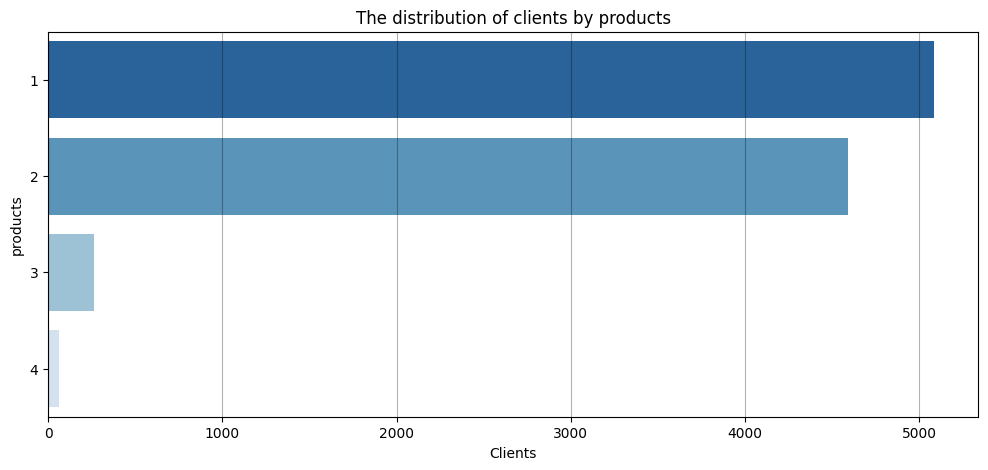

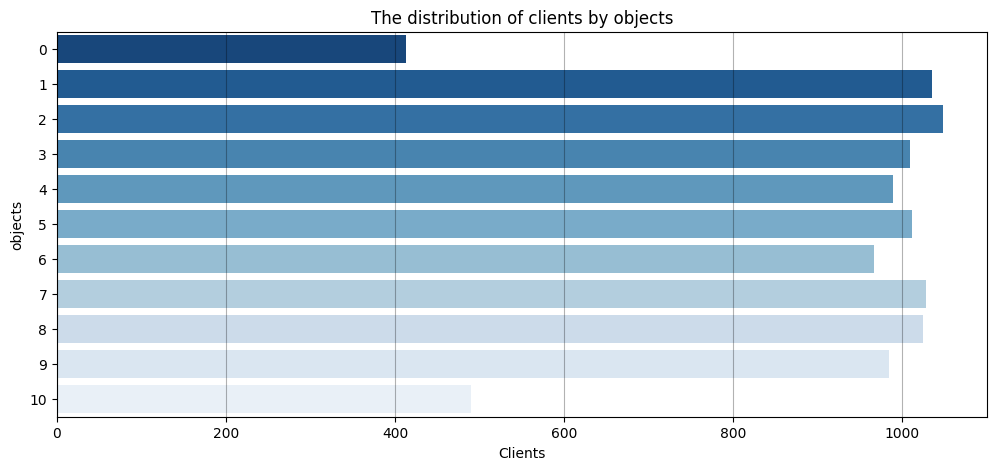

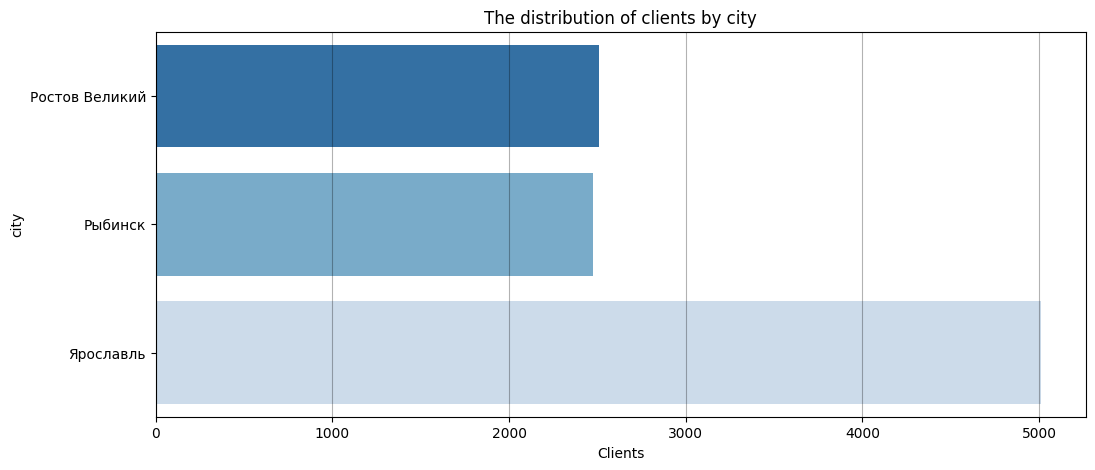

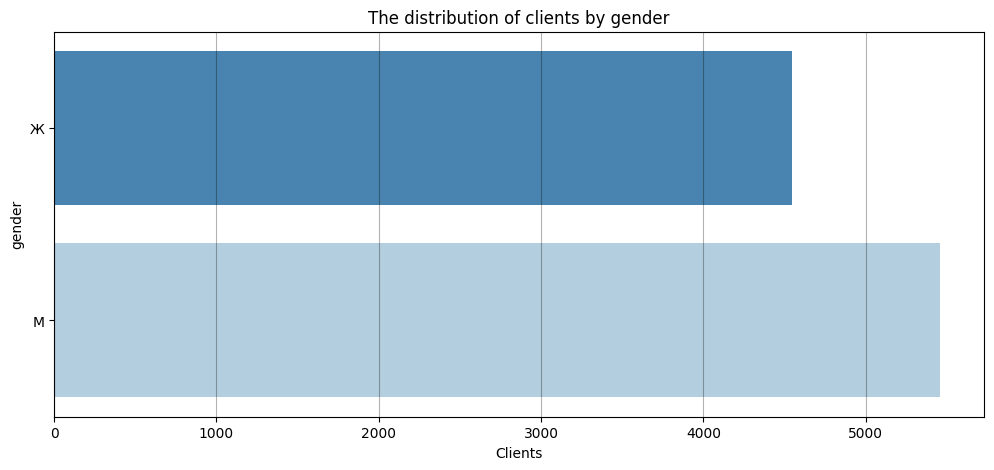

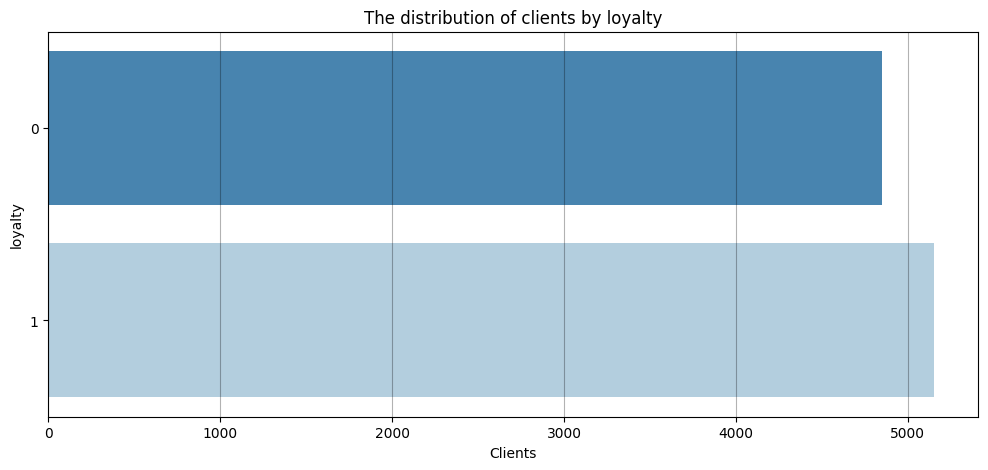

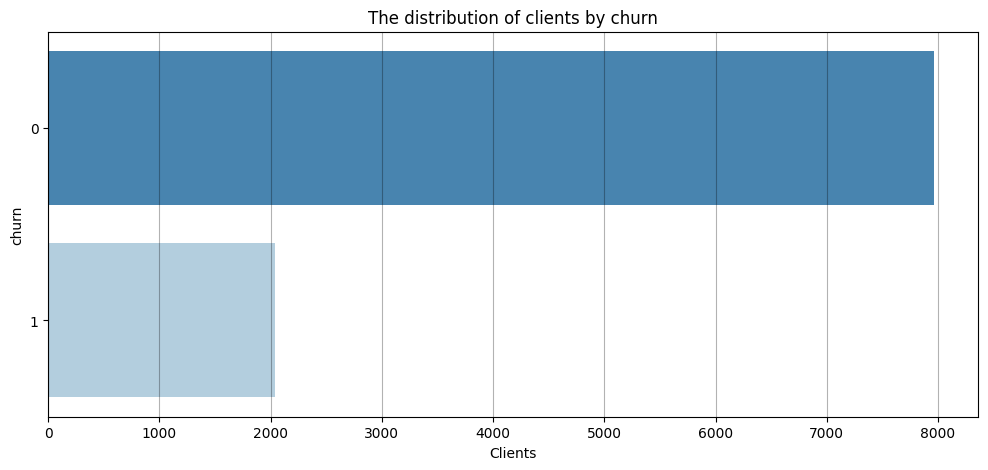

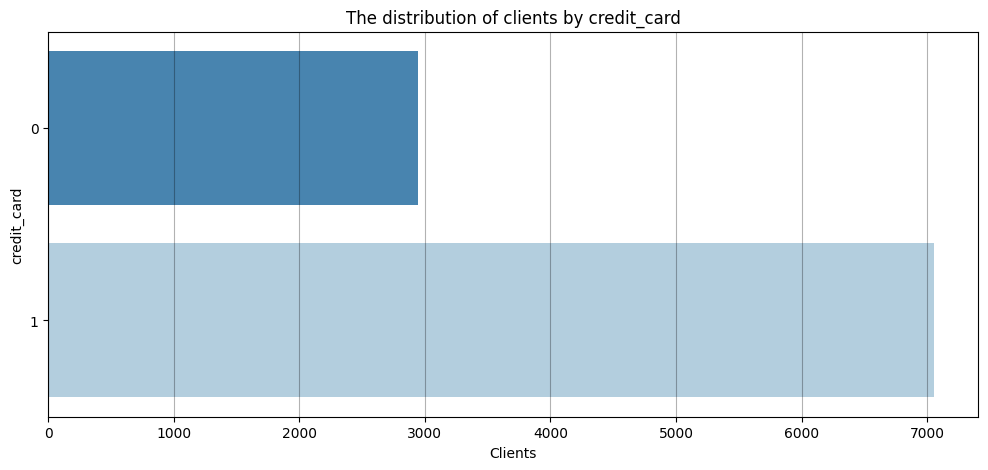

In [22]:
for i in ["products","objects","city","gender","loyalty","churn","credit_card"]:
  aggregation(i)
  print()

1. Большинство клиентов пользуются 1-2 продуктами;
2. У подавляющего большинства пользователей в собственности от 1 до 9 (включительно) объектов недвижипости;
3. Больше половины клиетов банка из города Ярославль;
4. Мужчин немногим больше чем женщин;




**Summary:**

1. The credit scoring of clients seems normal, but there's a high score concentration (around 300 users) with scores above 840 that needs further investigation.
2. There's nothing significant to add to the "balance" column. It's likely just the balance of money in the account.
3. The distribution of "estimated salary" is intriguing. It's likely that there's unreported income (unofficial work) or the classic approach of underreporting income for tax purposes (when the officially reported salary is low).
4. Four age groups stand out: 26-27, 38-40, 48-50, and 60-62 years. These age groups are likely to be used for customer segmentation.
5. Most clients use 1-2 bank products.
6. The vast majority of clients own 1 to 9 (inclusive) real estate properties.
7. More than half of the bank's clients are from the city of Yaroslavl.
8. There are slightly more male clients than female clients.
9. Active clients are slightly more numerous than inactive clients.
10. A churn rate of 20% is observed.
11. We can proceed to exploratory data analysis.
12. With this summary, we're ready to move on to exploratory data analysis.


## Exploratory Data Analysis (EDA)
---

Let's construct a correlation matrix for an initial overview of the data analysis.

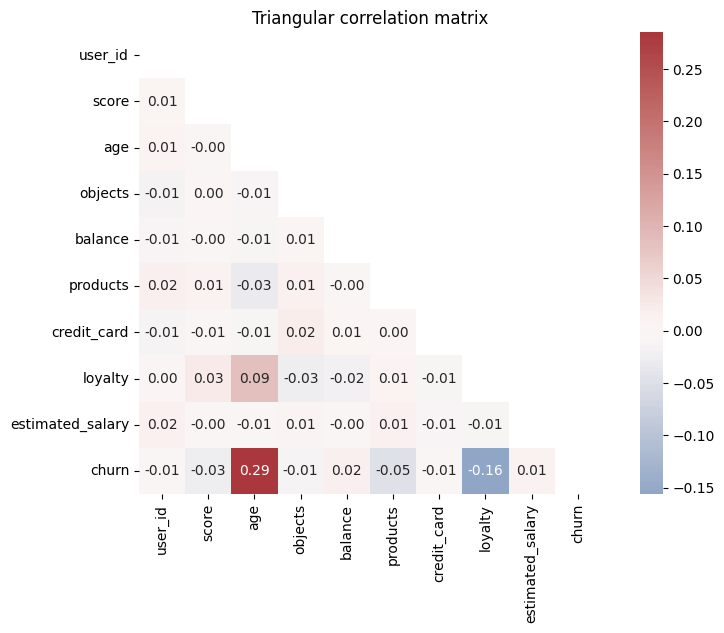

In [23]:
# creating corr data
corr =  data.corr()

# creating the mask for masking upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# creating custom divergin palette
cmap = sns.color_palette("vlag", as_cmap=True)

# drawing matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title('Triangular correlation matrix')
plt.show();

Let's examine this matrix with a breakdown by cities.

In [24]:
dummies_data = pd.get_dummies(data, prefix='dummie', prefix_sep='_', dummy_na=False, columns=['city','gender'], sparse=False, drop_first=False, dtype=None)
dummies_data

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,dummie_Ростов Великий,dummie_Рыбинск,dummie_Ярославль,dummie_Ж,dummie_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,15627268,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


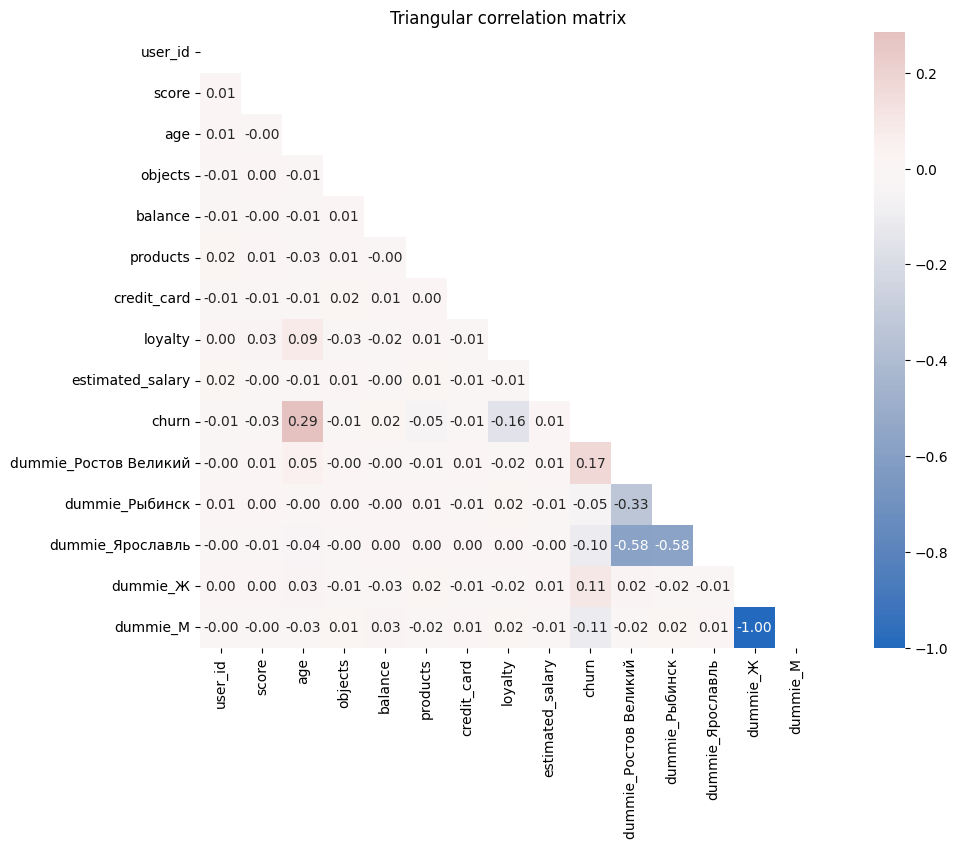

In [25]:
# creating corr data
corr1 =  dummies_data.corr()

# creating the mask for masking upper traingle
mask1 = np.triu(np.ones_like(corr1, dtype=bool))

# creating custom divergin palette
cmap1 = sns.color_palette("vlag", as_cmap=True)

# drawing matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr1, mask=mask1, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title('Triangular correlation matrix')
plt.show();

1. No strong explicit correlation was found.
2. The strongest correlation with churn is customer age (this is the second mention of age and churn).
3. Client activity is inversely proportional to churn.
4. Interesting fact: Rostov Veliky "correlates" with churn, while Yaroslavl is the opposite.

Let's examine the distribution plots and box plots broken down by the "churn" feature using the `churn_distribution` function that draws histograms and box plots for the specified columns (continuous variables) of the dataset, divided by the churn feature.

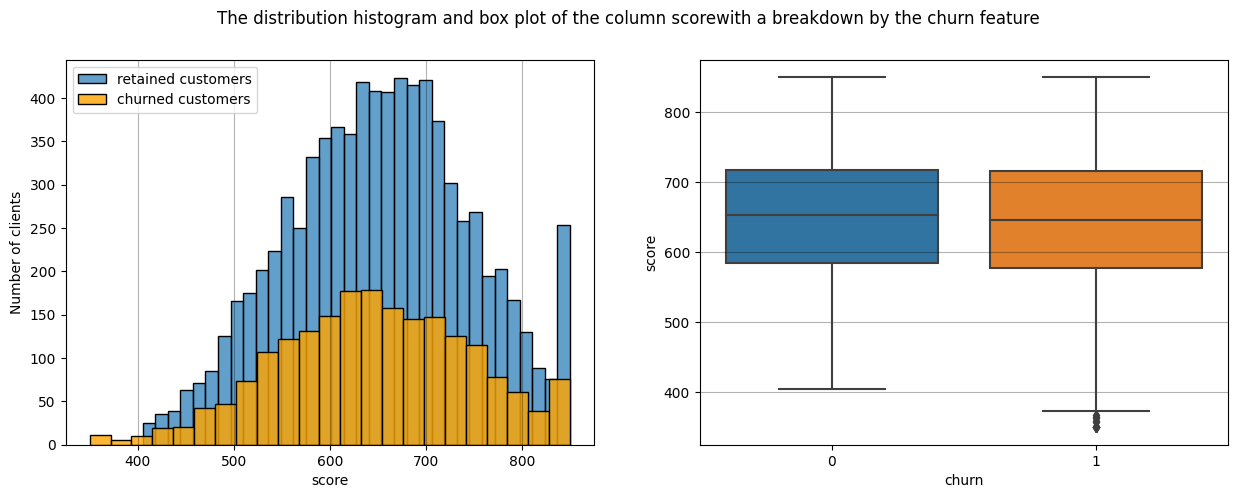

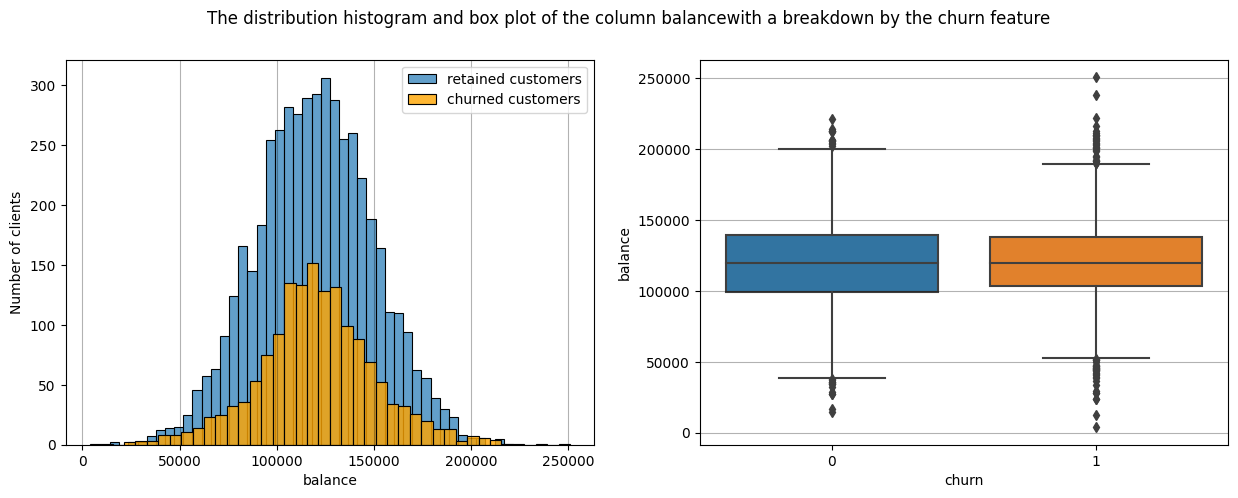

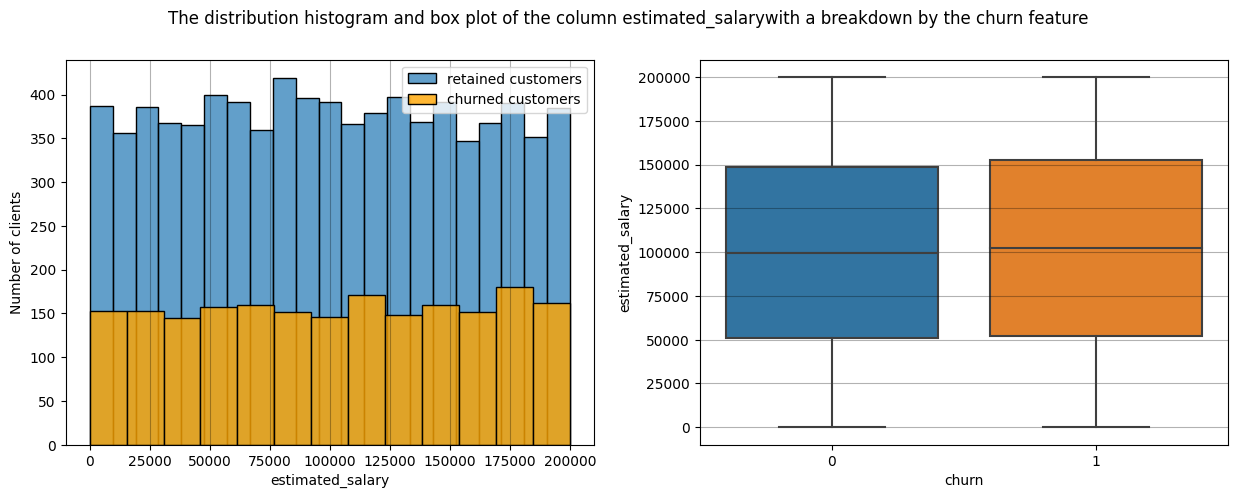

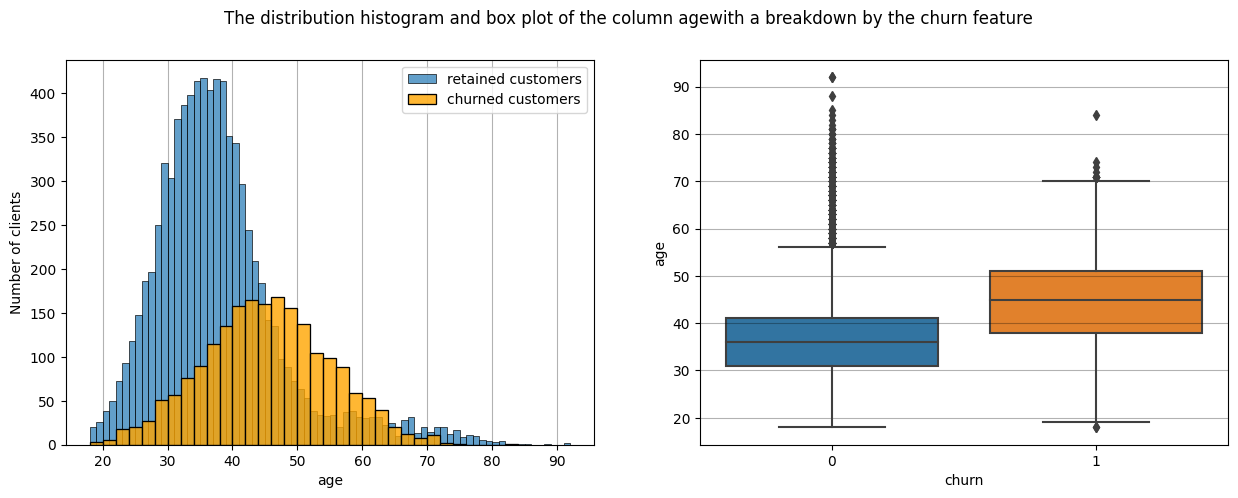

In [26]:
for i in ["score", "balance", "estimated_salary", "age"]:
  churn_distribution(i)

Here's a lead related to the age group. The churn distribution is skewed by age. Let's take a closer look.

In [27]:
data.groupby('churn').agg('median')

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,,
0,15734279.0,653.0,36.0,5.0,119791.215,2.0,1.0,1.0,99645.04
1,15731699.0,646.0,45.0,5.0,119948.090,1.0,1.0,0.0,102460.84


1. The distributions across all columns, broken down by the churn feature, appear normal, except for the age column.
2. When analyzing the age distribution graphs with a breakdown by the churn feature, it's noticeable that people above 45 years old (specifically, at ages 36 and 45) tend to stop using the bank's services.

Сhecking the "tabular" box plots by age with a breakdown by churn.

In [28]:
data.groupby('churn')['age'].describe().T

churn,0,1
count,7963.000000,2037.000000
mean,37.408389,44.837997
std,10.125363,9.761562
min,18.000000,18.000000
25%,31.000000,38.000000
50%,36.000000,45.000000
75%,41.000000,51.000000
max,92.000000,84.000000


**75% of churned customers** are aged **38 or older.**

I will check the charts of the proportion of clients broken down by the "churn" feature using the `churn_aggregation` function, which creates bar charts for the specified columns (discrete variables) of the dataset, divided by the churn feature.

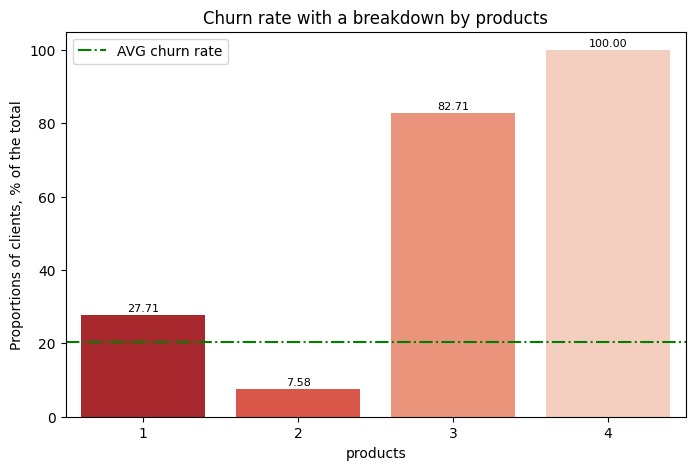

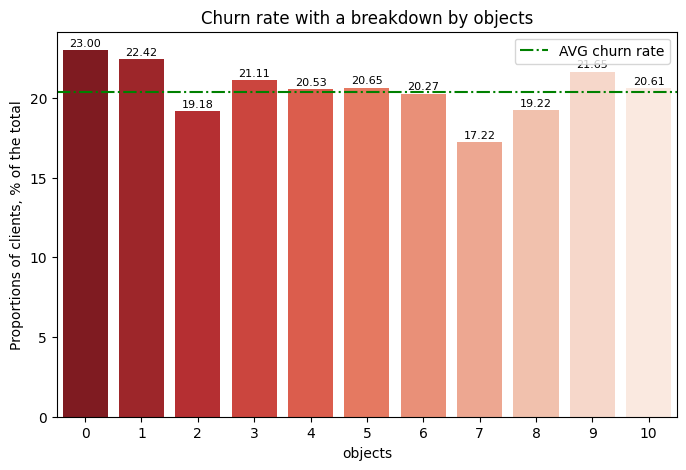

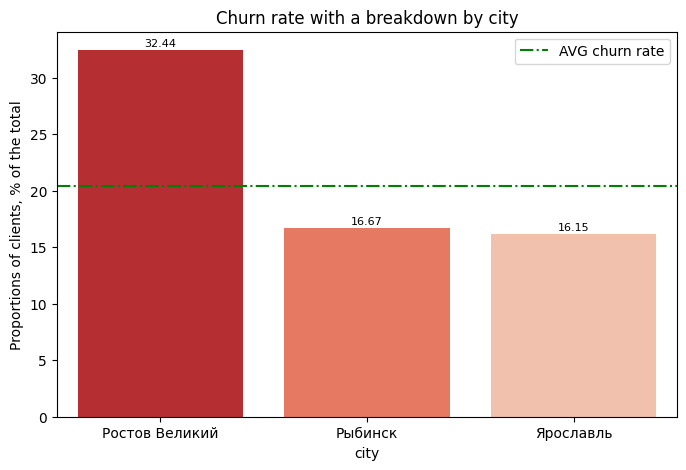

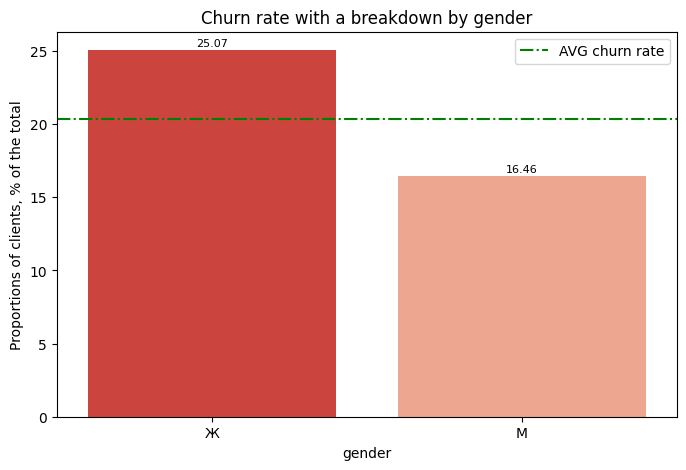

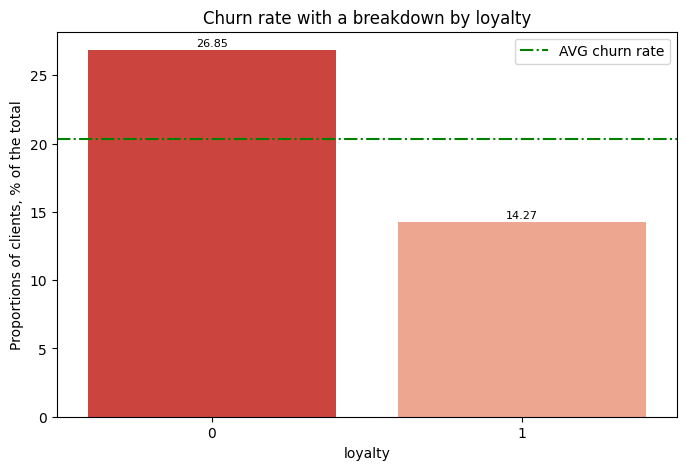

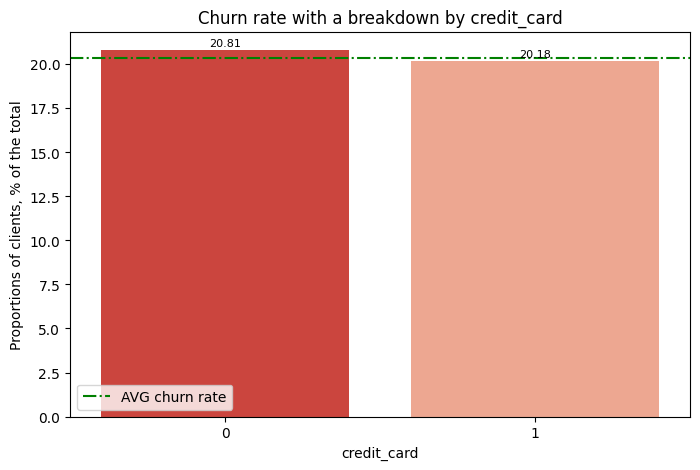

In [29]:
for i in ["products","objects","city","gender","loyalty","credit_card"]:
  churn_aggregation(i)
  print()

**Summary:**

1. An evident characteristic related to customer churn is the age group of 38 or older.
2. Clients using 1, 3, or 4 products have churn proportions of 27.71%, 82.71%, and 100% respectively.
3. The number of objects owned by clients does not influence churn.
4. Clients from Rostov Veliky are almost twice as likely to churn compared to those from Rybinsk or Yaroslavl (32.44% vs. 16.67% and 16.15%).
5. Women slightly more often stop using the bank's services - a churn rate of 25%, compared to 16.46% for men.
6. Inactive clients have a 26.85% churn rate. Active clients have a lower churn rate of 14.27%.
7. The presence of a credit card does not significantly affect churn.

**Segmentation Preparation**

Based on the aggregation of the previous conclusions, we can create several segments with a churn rate above 20% using the following criteria:

1. Age older than 38.
2. Users of 1, 3, or 4 products.
3. From the city of Rostov Veliky.
4. Women.
5. Inactive clients.

I will analyze the churn rate among customers based on the selected criteria.

In [30]:
(data
    .query('age > 38')
    .groupby(['gender','city','products'])
    .agg(count=('age','count'), churn=('churn','mean'))
    .sort_values(by='churn', ascending=False)
)

count     churn
gender city           products                 
М      Ярославль      4             9  1.000000
Ж      Ростов Великий 4             9  1.000000
М      Рыбинск        4             1  1.000000
Ж      Рыбинск        4             4  1.000000
М      Ростов Великий 4            10  1.000000
Ж      Ярославль      4            15  1.000000
М      Ростов Великий 3            33  0.969697
Ж      Рыбинск        3            27  0.962963
       Ростов Великий 3            37  0.945946
       Ярославль      3            41  0.926829
М      Рыбинск        3            10  0.900000
       Ярославль      3            31  0.774194
Ж      Ростов Великий 1           359  0.643454
М      Ростов Великий 1           351  0.584046
Ж      Ярославль      1           538  0.442379
       Рыбинск        1           264  0.371212
М      Ярославль      1           594  0.321549
       Рыбинск        1           324  0.277778
Ж      Ростов Великий 2           209  0.267943
       Рыбинск        2           219  0.178082
М      Ростов Великий 2           232  0.155172
Ж      Ярославль      2           395  0.139241
М      Рыбинск        2           247  0.105263
       Ярославль      2           477  0.073375

**The most significant factor is the number of products used by clients.** The churn rate is above average for users **with 1, 3, or 4 products.** However, in the city of Rostov Veliky, the churn rate among women is above average, even in the case of using 2 products.

Let's separately analyze the churn rate in the city of Rostov Veliky:

In [31]:
(data
    .query('city == "Ростов Великий"')
    .groupby(['products','gender'])
    .agg(count=('age','count'), age=('age','mean'), churn=('churn','mean'))
    .sort_values(by='churn', ascending=False)
)

count        age     churn
products gender                            
4        Ж          14  43.071429  1.000000
         М          10  46.300000  1.000000
3        М          43  43.627907  0.930233
         Ж          53  43.679245  0.867925
1        Ж         664  40.668675  0.471386
         М         685  40.478832  0.386861
2        Ж         462  38.922078  0.162338
         М         578  37.743945  0.088235

**In Rostov Veliky, the average churn rate among female clients** is lower than the overall average, but **it's twice as high as that among male clients.**

Checking based on the loyalty feature:

In [32]:
(data
 .query('loyalty == 0')
 .groupby(['gender','city','products'])
 .agg(count=('age','count'),age=('age','median'), churn=('churn','mean'))
 .sort_values(by='churn', ascending=False)
)

count   age     churn
gender city           products                       
М      Ярославль      4             5  44.0  1.000000
Ж      Ростов Великий 4            10  43.0  1.000000
М      Рыбинск        4             2  41.0  1.000000
Ж      Рыбинск        4             3  50.0  1.000000
М      Ростов Великий 4             4  45.5  1.000000
Ж      Ярославль      4             7  45.0  1.000000
       Ростов Великий 3            29  45.0  0.931034
М      Ростов Великий 3            26  42.0  0.923077
Ж      Ярославль      3            36  42.5  0.916667
       Рыбинск        3            26  43.0  0.846154
М      Рыбинск        3            12  39.5  0.833333
       Ярославль      3            24  41.0  0.791667
Ж      Ростов Великий 1           373  40.0  0.546917
М      Ростов Великий 1           347  39.0  0.492795
Ж      Рыбинск        1           240  39.0  0.400000
       Ярославль      1           548  38.0  0.363139
М      Рыбинск        1           308  38.0  0.266234
       Ярославль      1           705  37.0  0.243972
Ж      Ростов Великий 2           222  37.0  0.189189
М      Ростов Великий 2           250  36.0  0.144000
Ж      Рыбинск        2           257  36.0  0.128405
       Ярославль      2           508  35.0  0.096457
М      Рыбинск        2           317  36.0  0.075710
       Ярославль      2           590  36.0  0.047458

The **median age** of inactive customers prone **to churn is 37 years.**

Summarize:

**First segment:** Customers using 1, 3, or 4 products, aged 39 or older.

**Second segment:** Women from the city of Rostov Veliky.

**Third segment:** Inactive clients aged 37 or older.

Conducting a check of the segments in the order presented above, excluding:

In [33]:
data_first = data.query('age > 38 and churn == 1 and products != 2')
list_first = data_first['user_id'].tolist()
print('The number of churned customers in the first segment, as a proportion of the total dataset:',len(data_first))


The number of churned customers in the first segment, as a proportion of the total dataset: 1265


In [34]:
data_1 = data.query('user_id not in @list_first')
print('The number of all customers in the dataset, excluding the first segment:',len(data_1))

The number of all customers in the dataset, excluding the first segment: 8735


In [35]:
data_second = data_1.query('loyalty == 0 and churn == 1 and age > 36')
list_second = data_second['user_id'].tolist()
print('The number of churned customers in the second segment, as a proportion of the dataset excluding the first segment:',len(data_second))

The number of churned customers in the second segment, as a proportion of the dataset excluding the first segment: 222


In [36]:
data_2 = data_1.query('user_id not in @list_second')
print('The number of all customers in the dataset, excluding the first and second segments:',len(data_2))

The number of all customers in the dataset, excluding the first and second segments: 8513


In [37]:
data_third = data_2.query('city == "Ростов Великий" and churn == 1 and gender == "Ж"')
list_third = data_third['user_id'].tolist()
print('The number of churned customers in the third segment, as a proportion of the dataset excluding the first and second segments:',len(data_third))

The number of churned customers in the third segment, as a proportion of the dataset excluding the first and second segments: 129


In [38]:
data_3 = data_2.query('user_id not in @list_third')
print('The number of all customers in the dataset, excluding the churned segments:', len(data_3))

The number of all customers in the dataset, excluding the churned segments: 8384


I'll compile the calculations into a table.

In [39]:
details = {
    'DataSet' : ['Original', 'Without I segment', 'Without I+II segments', 'Without all segments'],
    'Size' : [len(data), len(data_1), len(data_2), len(data_3)],
    'Churn rate, %' : [round(data['churn'].mean()*100,2), round(data_1['churn'].mean()*100,2), round(data_2['churn'].mean()*100,2), round(data_3['churn'].mean()*100,2)],
}

df = pd.DataFrame(details)

df

,DataSet,Size,"Churn rate, %"
0,Original,10000,20.37
1,Without I segment,8735,8.84
2,Without I+II segments,8513,6.46
3,Without all segments,8384,5.02


Therefore, by implementing retention strategies for churned customer segments, it's possible to retain up to 16.16% of the customers, compared to the overall average churn rate of 20.37%.

## Hypothesis testing
---

Test these statements using the method of hypothesis testing for the equality of means of two populations and calculate the variances using `ttest_ind`, since we do not know if the variances of the samples are equal, and additionally, we will set the parameter `equal_var=False`. The significance level (Student's criterion) set as 5%, based on commonly accepted standards.

### Hypothesis 1
---

* H0: Income among churned clients and retained clients is **equal**.
    
* H1: Income among churned clients and retained clients **differs**.

In [40]:
results = sc.stats.ttest_ind(data.query('churn == 1')['estimated_salary'], data.query('churn == 0')['estimated_salary'], equal_var=False)
print('P-value:',results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is not rejected.")

P-value: 0.22892461305145798
The null hypothesis is not rejected.


Failed to reject the null hypothesis, and thus, it appears that there is no statistically significant difference in the incomes of retained and churned clients. This is further supported (although not definitively) by the box plots of incomes for churned and retained clients.


### Hypothesis 2
---

* H0: Scoring among churned clients and retained clients is **equal**.

* H1: Scoring among churned clients and retained clients **differs**.

In [41]:
results = sc.stats.ttest_ind(data.query('churn == 1')['score'], data.query('churn == 0')['score'], equal_var=False)
print('P-value:',results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is not rejected.")

P-value: 0.008464728991832862
The null hypothesis is rejected.


Rejecting the null hypothesis and accept the alternative hypothesis, thus, the scoring scores between churned and retained clients statistically differ. As an example, consider the box plot of the "score" column with the breakdown by "churn" status.

## Overall Conclusion:
___



**As a result of studying the `bank_dataset.csv` dataset:**

1. The dataset contains 10,000 rows.
2. Missing values are present in the "Balance" column.
3. There are no explicit duplicates.
4. Data types match the logical column names.
5. It's necessary to standardize column names.
6. The age of clients ranges from 18 to 92 years.
7. The number of owned objects ranges from 0 to 10.
8. Credit scoring scores range from 350 to 850.
9. The number of bank products used by clients ranges from 1 to 4.
10. Implicit duplicates need to be checked.
11. 70% of clients use credit cards.
12. 51% of clients are active.
13. The average churn rate is 20.37%.
---
**Data preprocessing was performed** and an initial exploration of the column characteristics, resulting in the following information:

1. The credit scoring of clients appears to be normal, but there's a high concentration of users (around 300) with scores above 840.
2. The distribution of "estimated salary" is intriguing. It's likely indicative of "undeclared" income or a classic scenario of tax evasion (where the official salary reported on documents is low).
3. Most clients use 1-2 products from the bank.
4. The majority of users own between 1 and 9 (inclusive) real estate properties.
5. Over half of the bank's clients are from the city of Yaroslavl.
6. There are slightly more male clients than female clients.
7. The number of active clients is slightly higher than the number of inactive clients.
---

**As a result of in-depth (exploratory) data analysis, the following observations have been made:**

1. An evident observation regarding customer churn is the age group above 38 years.
2. Clients using 1, 3, or 4 products have churn rates of 27.71%, 82.71%, and 100% respectively.
3. The number of properties owned does not affect churn.
4. Customers from Rostov Veliky are almost twice as likely to churn compared to those from Rybinsk or Yaroslavl (32.44% vs. 16.67% and 16.15% respectively).
5. Women are slightly more prone to churn, with a churn rate of 25% compared to 16.46% for men.
6. Inactive clients have a churn rate of 26.85%, while active clients have a rate of 14.27%.
7. The presence of a credit card does not affect churn.
---
**Based on the results of the exploratory data analysis, the following segments with the highest churn rates were identified:**

**First Segment:** Clients using 1, 3, or 4 products, aged 39 or older.

**Second Segment:** Women from the city of Rostov Veliky.

**Third Segment:** Inactive clients aged 37 and older.

Thus, by implementing specific actions (recommendations provided below) to retain customers in these identified churn-prone segments, **it is possible to retain up to 16.16% of the customers**, despite the overall average churn rate being 20.37%.

---
**Рекомендации:**
**First Segment:** Clients using 1, 3, or 4 products, aged 39 and older:

For customers using multiple products, offering **bonuses, discounts, or special privileges** could be effective. Clients may churn because they become dissatisfied with one or more of the bank's products.

**Personal financial consultants for users with 3+ products** who can assist them in managing their finances, suggest investment opportunities, and help them achieve their financial goals.

Regular feedback through an **advanced chat-based customer support system**:
Implement technical support through a user-friendly chat format, avoiding complex financial jargon, to improve understanding of the banking system for regular users.
Conduct regular analyses of support inquiries to assess their needs and suggest improvements or new products that could better suit their situation.

---

**Second Segment:** Women from Rostov Veliky:

**Special offers for women:** Develop customized financial products and services that cater to the needs and interests of women.

**Women's financial events:** Organize events and seminars on financial literacy specifically tailored to women. This could include a financial planning school, forums for sharing experiences and advice, or lectures from successful women in the financial industry.

---

**Third Segment:** Inactive clients aged 37 and older:

**Reactivation through personal contact:** Use an advanced chat support system to engage with these clients and encourage them to become active users of the bank's products.

**Personalized offers based on a marketing system:** Use the data from their previous transactions and interests to create customized offers. Perhaps these clients would be interested in unique conditions or discounts on other bank products.
